In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [3]:
columns =['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

In [4]:
df.columns = columns

In [5]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
sns.set_style('whitegrid')

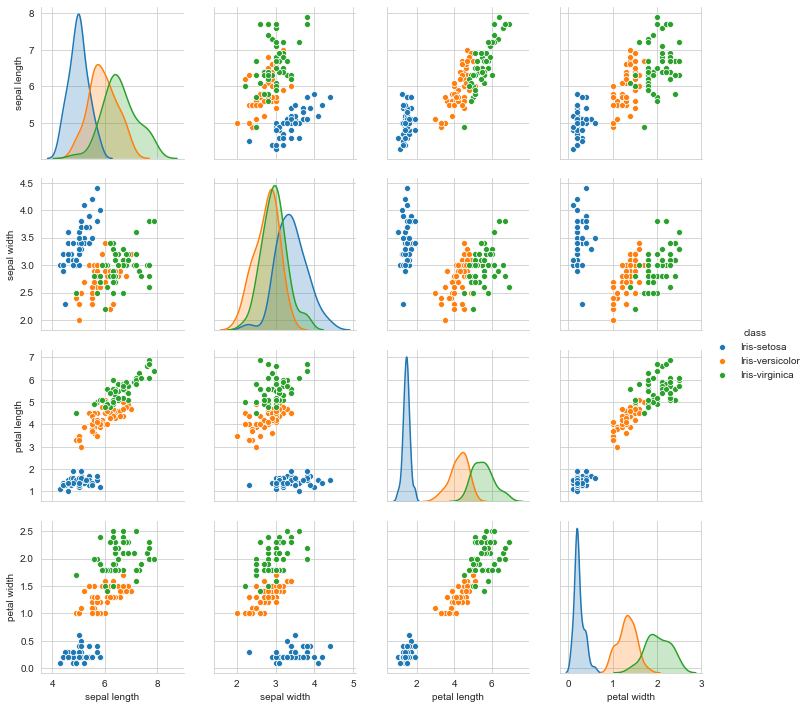

In [7]:
# First a pairplot of all the different features
sns.pairplot(df,hue='class')

In [8]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
Iris_setosa_df = df.where(df['class']=='Iris-setosa').dropna()
Iris_versicolor_df = df.where(df['class']=='Iris-versicolor').dropna()
Iris_virginica_df = df.where(df['class']=='Iris-virginica').dropna()

In [10]:
print(Iris_setosa_df.shape)
print(Iris_versicolor_df.shape)
print(Iris_virginica_df.shape)

(49, 5)
(50, 5)
(50, 5)


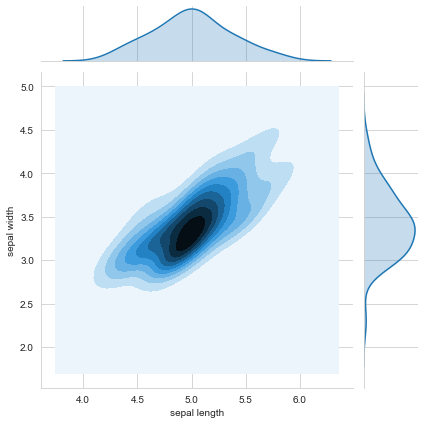

In [11]:
sns.jointplot(x=Iris_setosa_df['sepal length'], 
              y=Iris_setosa_df['sepal width'], kind="kde")

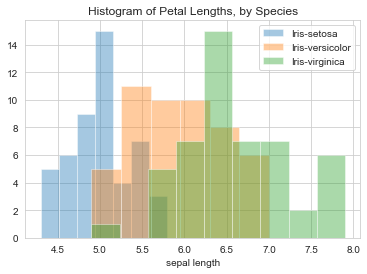

In [12]:
# Histograms for each species
sns.distplot(a=Iris_setosa_df['sepal length'], label="Iris-setosa", kde=False)
sns.distplot(a=Iris_versicolor_df['sepal length'], label="Iris-versicolor", kde=False)
sns.distplot(a=Iris_virginica_df['sepal length'], label="Iris-virginica", kde=False)

# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["Iris-virginica", "Iris-setosa", "Iris-versicolor"])

LabelEncoder()

In [14]:
cl = df['class'].values
cl = le.transform(cl)
df.drop('class', axis=1, inplace=True)
df_sc = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_sc)
df_scaled.head()
x_train, x_test, y_train, y_test = train_test_split(df_scaled, cl, test_size = 0.3, random_state = 12345)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(104, 4)
(104,)
(45, 4)
(45,)


In [16]:
type(x_train)

pandas.core.frame.DataFrame

In [17]:
x_train_np = np.array(x_train)
y_train_np = np.array(y_train)
x_test_np = np.array(x_test)
y_test_np = np.array(y_test)

In [18]:
train_x, test_x = tf.cast(x_train_np, tf.float32), tf.cast(x_test_np, tf.float32)
train_y, test_y = tf.cast(y_train_np,tf.int64),tf.cast(y_test_np,tf.int64)

In [19]:
batch_size = 5 # 32 is default but specify anyway
epochs=100

In [20]:
class MyModel(tf.keras.Model):
    def __init__(self, num_classes=3):
        super(MyModel, self).__init__()
   # Define your layers here.
        inputs = tf.keras.Input(shape=[train_x.shape[1]])  # Returns a placeholder tensor
        self.x0 = tf.keras.layers.Flatten()
        self.x1 = tf.keras.layers.Dense(512, activation='relu',name='d1')
        self.x2 = tf.keras.layers.Dense(100, activation='relu',name='d2')
        self.predictions = tf.keras.layers.Dense(3,activation=tf.nn.softmax, name='d2')
    def call(self, inputs):

        x = self.x0(inputs)
        x = self.x1(x)
        x = self.x2(x)
        return self.predictions(x)

In [21]:
model = MyModel()

In [22]:
optimiser = tf.keras.optimizers.Adam()
model.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_x, train_y, batch_size=32, epochs=epochs)

Epoch 1/100
104/104 [==============================] - 0s 4ms/sample - loss: 1.0288 - accuracy: 0.4904
Epoch 2/100
104/104 [==============================] - 0s 147us/sample - loss: 0.7656 - accuracy: 0.7692
Epoch 3/100
104/104 [==============================] - 0s 149us/sample - loss: 0.6123 - accuracy: 0.7788
Epoch 4/100
104/104 [==============================] - 0s 171us/sample - loss: 0.5166 - accuracy: 0.7692
Epoch 5/100
104/104 [==============================] - 0s 155us/sample - loss: 0.4491 - accuracy: 0.7885
Epoch 6/100
104/104 [==============================] - 0s 148us/sample - loss: 0.3958 - accuracy: 0.7981
Epoch 7/100
104/104 [==============================] - 0s 142us/sample - loss: 0.3545 - accuracy: 0.8462
Epoch 8/100
104/104 [==============================] - 0s 104us/sample - loss: 0.3263 - accuracy: 0.8846
Epoch 9/100
104/104 [==============================] - 0s 139us/sample - loss: 0.3007 - accuracy: 0.9038
Epoch 10/100
104/104 [==============================] - 0

104/104 [==============================] - 0s 113us/sample - loss: 0.0386 - accuracy: 0.9808
Epoch 79/100
104/104 [==============================] - 0s 102us/sample - loss: 0.0372 - accuracy: 0.9808
Epoch 80/100
104/104 [==============================] - 0s 117us/sample - loss: 0.0367 - accuracy: 0.9808
Epoch 81/100
104/104 [==============================] - 0s 113us/sample - loss: 0.0371 - accuracy: 0.9808
Epoch 82/100
104/104 [==============================] - 0s 112us/sample - loss: 0.0360 - accuracy: 0.9808
Epoch 83/100
104/104 [==============================] - 0s 97us/sample - loss: 0.0359 - accuracy: 0.9808
Epoch 84/100
104/104 [==============================] - 0s 130us/sample - loss: 0.0364 - accuracy: 0.9808
Epoch 85/100
104/104 [==============================] - 0s 110us/sample - loss: 0.0365 - accuracy: 0.9808
Epoch 86/100
104/104 [==============================] - 0s 100us/sample - loss: 0.0370 - accuracy: 0.9808
Epoch 87/100
104/104 [==============================] - 0s 1

In [23]:
model.evaluate(test_x, test_y)

45/45 [==============================] - 0s 1ms/sample - loss: 0.1191 - accuracy: 0.9333


[0.11905499630504185, 0.93333334]

In [24]:
model1 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512,activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(3,activation=tf.nn.softmax)
])

In [25]:
optimiser = tf.keras.optimizers.Adam()

model1.compile (optimizer= optimiser, 
                loss='sparse_categorical_crossentropy', 
                metrics = ['accuracy'])

In [26]:
model1.fit(train_x, train_y, 
           batch_size=batch_size, epochs=epochs)

Epoch 1/100
104/104 [==============================] - 0s 2ms/sample - loss: 0.8641 - accuracy: 0.6538
Epoch 2/100
104/104 [==============================] - 0s 457us/sample - loss: 0.5239 - accuracy: 0.7885
Epoch 3/100
104/104 [==============================] - 0s 453us/sample - loss: 0.4163 - accuracy: 0.8269
Epoch 4/100
104/104 [==============================] - 0s 484us/sample - loss: 0.3556 - accuracy: 0.8462
Epoch 5/100
104/104 [==============================] - 0s 461us/sample - loss: 0.3072 - accuracy: 0.8654
Epoch 6/100
104/104 [==============================] - 0s 450us/sample - loss: 0.2737 - accuracy: 0.8942
Epoch 7/100
104/104 [==============================] - 0s 464us/sample - loss: 0.2365 - accuracy: 0.9327
Epoch 8/100
104/104 [==============================] - 0s 454us/sample - loss: 0.2116 - accuracy: 0.9519
Epoch 9/100
104/104 [==============================] - 0s 452us/sample - loss: 0.1863 - accuracy: 0.9615
Epoch 10/100
104/104 [==============================] - 0

104/104 [==============================] - 0s 398us/sample - loss: 0.0373 - accuracy: 0.9808
Epoch 79/100
104/104 [==============================] - 0s 385us/sample - loss: 0.0462 - accuracy: 0.9808
Epoch 80/100
104/104 [==============================] - 0s 396us/sample - loss: 0.0452 - accuracy: 0.9808
Epoch 81/100
104/104 [==============================] - 0s 323us/sample - loss: 0.0474 - accuracy: 0.9808
Epoch 82/100
104/104 [==============================] - 0s 354us/sample - loss: 0.0510 - accuracy: 0.9808
Epoch 83/100
104/104 [==============================] - 0s 360us/sample - loss: 0.0479 - accuracy: 0.9808
Epoch 84/100
104/104 [==============================] - 0s 337us/sample - loss: 0.0479 - accuracy: 0.9808
Epoch 85/100
104/104 [==============================] - 0s 345us/sample - loss: 0.0401 - accuracy: 0.9808
Epoch 86/100
104/104 [==============================] - 0s 380us/sample - loss: 0.0495 - accuracy: 0.9808
Epoch 87/100
104/104 [==============================] - 0s 

In [27]:
test_out = model1(test_x, training=False)